In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [74]:
from statsmodels.tsa.arima_model import ARMA


Time series variables:
eg.
X= S&P 500 daily closing prices for 2008
T = entire period (year)
t = single period(day)

In [4]:
raw_csv_data = pd.read_csv("C:/Users/lochr/Python/time series/3_ TS intro and loading data/Index2018.csv")
raw_csv_data

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [5]:
df_comp = raw_csv_data.copy()
df_comp

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [6]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
df_comp.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [8]:
#isna = True: there is missing value
#or
#1=True
#0 = false

In [9]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [10]:
#no NA value, see below if wanna check specific column 

In [11]:
df_comp.spx.isna().sum()

0

In [12]:
#change index from count to date

time-series
to_datetime:Assumes we are plugging in a string in a 'mm/dd/yyyy' form



In [13]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.900000,2224.95,3445.980000,18124.01
1,1994-01-10,475.270000,2225.00,3440.580000,18443.44
2,1994-01-11,474.130000,2228.10,3413.770000,18485.25
3,1994-01-12,474.170000,2182.06,3372.020000,18793.88
4,1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,2018-01-23,2839.130362,13559.60,7731.827774,24124.15
6265,2018-01-24,2837.544008,13414.74,7643.428966,23940.78
6266,2018-01-25,2839.253031,13298.36,7615.839954,23669.49
6267,2018-01-26,2872.867839,13340.17,7665.541292,23631.88


python now recognise the dates as date values, not str

In [14]:
df_comp.date.describe()

C:\Users\lochr\AppData\Local\Temp\ipykernel_11000\49469409.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [15]:
df_comp.set_index('date', inplace=True)
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


<AxesSubplot:title={'center':'S&P 500 prices overtime'}, xlabel='date'>

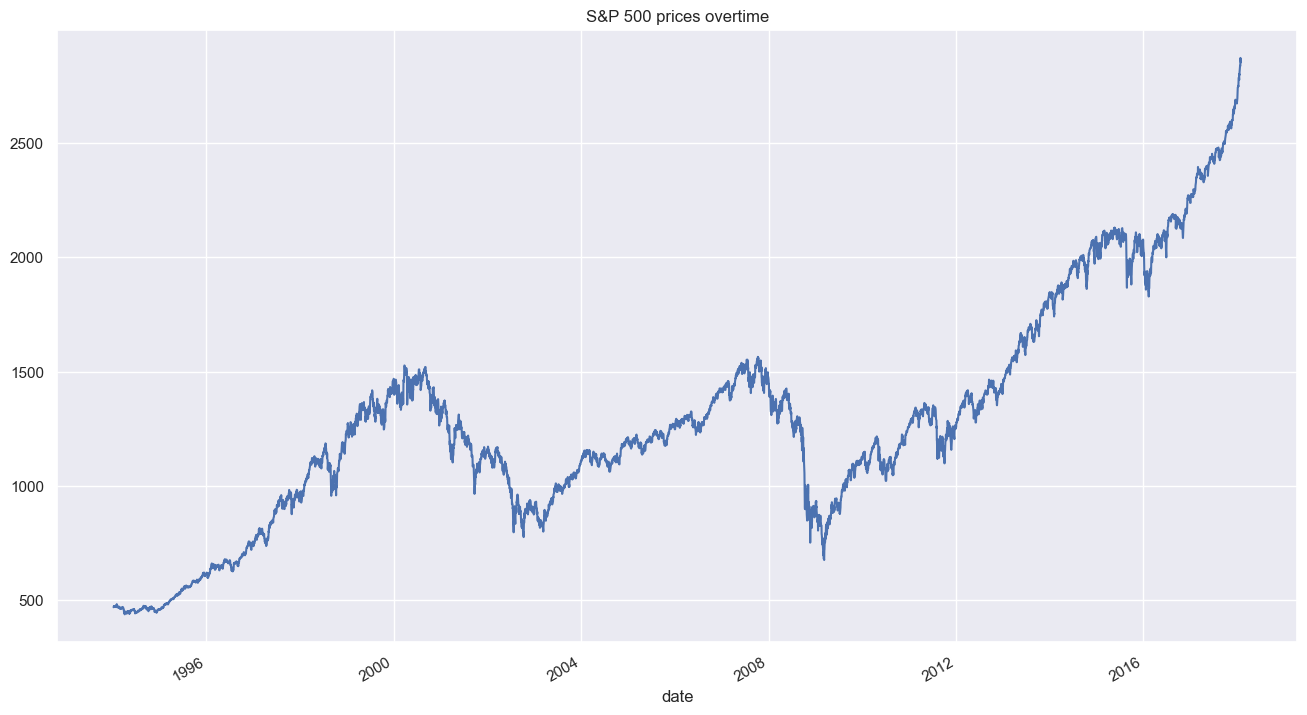

In [16]:
df_comp.spx.plot(title = 'S&P 500 prices overtime', figsize = (16,9))


In [17]:
#boom: dotcom and housing market bubble

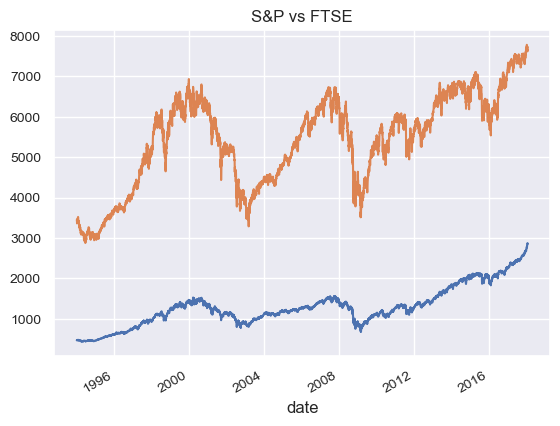

In [18]:
df_comp.spx.plot()
df_comp.ftse.plot(fontsize = 10)
plt.title('S&P vs FTSE')
plt.show()

QQ plot: Quantile-quantile plot  
'used to determine whether a data set is distributed in a certain way  
'usually showcase how the data fits a normal distribution  

In [19]:
import scipy.stats
import pylab

scipy.stats.probplot(df_comp.spx,plot = pylab)  
1st parameter: which data/series you want to analyse/test  
2nd parameter: the way you wanna the plot be expressed  
QQ plot takes all the values a variable can take, and arranges them in ascending order  
y-axis: price  
x-axis: shows how many STD away from the mean these values are  
red line: what the data points should follow, if they are normally distributed  
below graph does not follows the normal distribution - see lower left, too many '500' values.  Hence, cannot use statistics of normal distribution for further analysis/forcast

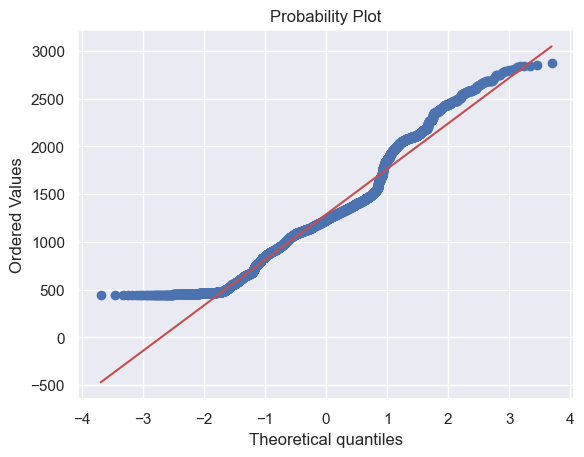

In [20]:
scipy.stats.probplot(df_comp.spx,plot = pylab)
pylab.show()

In [21]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [22]:
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


asfreq()  
The value this argument can take are specific letters of the alphabet  
eg. 'h' - hourly. 'w' = weekly, 'd'=daily, 'm' = monthly, 'a'= annually, 'b' = business days  
Analysis:  
NaN data: generated new data, which do not have values associated with them  
i.e. new data that is not in the original dataframe, those dates were not included in original set  
df dataset: Closing prices of financial indices, which can only be recorded during working days.  Hence, we are not interested in weekends/holidays/ nontrading days


In [23]:
df_comp_days = df_comp.asfreq('d')
df_comp_days

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


In [24]:
df_comp = df_comp.asfreq('b')
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [25]:
#check if any null values after assigning a frequency
#isna(): True = have missing value, False = no missing value

In [26]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [27]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

Assign values to NA values:  
1. Front filling: assign value of the previous period  
2. Back-filling: Assign value for the next period  
3. Assign the same value to all NA: eg. assign average/mean value to all NA values within the time series

In [28]:
df_comp_fill = df_comp.copy()
df_comp_fill

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [29]:
df_comp_fill.spx = df_comp_fill.spx.fillna(method = 'ffill')


In [30]:
df_comp_fill.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [31]:
df_comp_fill.ftse = df_comp_fill.ftse.fillna(method = 'bfill')
df_comp_fill.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [32]:
df_comp_fill.dax = df_comp_fill.dax.fillna(value = df_comp_fill.dax.mean())
df_comp_fill.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [33]:
df_comp_fill.nikkei = df_comp_fill.nikkei.fillna(value = df_comp_fill.nikkei.mean())
df_comp_fill.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [34]:
df_comp = df_comp_fill.copy()
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


remove other comlumn:
1. less data we load, faster processing
2. Clarity, easier to keep track of dataset  
only SP500 is required in upcoming analysis


In [35]:
df_comp['market_value'] = df_comp.spx
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4040.545253,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10711.090000,992.715221
50%,1233.761241,5774.380000,5663.300000,15014.040000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17858.420000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [36]:
del df_comp['spx'], df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


In [37]:
df_comp = df_comp.rename(columns={'market_value':'SP500_market_value' })
df_comp

,SP500_market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


Machine learning ML:  
need to split data into 2 sets:Training sets + testing sets  
So as to compare predictions to actual values  
Cannot shuffle data before splitting as time-series data relies on keeping the chronological order of the values.  
Shuffling data is impossible in TS data  
Both Training sets and testing sets have to be uninterrupted sequences of values  
Training set: should include all data from the beghinning till cut off point  
Testing set: from cut off point till end(the rest)  
Size of training set: 
too large: fits training set too well, performs poorly with new data  
too small: model not accurate enough  
This analysis: 80:20

In [38]:
#iloc - index location
#len - length

In [39]:
size = len(df_comp)*0.8
size

5021.6

In [40]:
size = int(len(df_comp)*0.8)
size

5021

In [41]:
## 'df' = training set
## 'df_test' = testing set

In [42]:
df = df_comp.iloc[:size]
df

,SP500_market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


In [43]:
df_test = df_comp.iloc[size:]
df_test

,SP500_market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


Whitenoise: A special type of time-series, where the data does not follow a pattern, also a seqquence of random data, where every value has a time-period associated with it.  
Whitenoise cannot be predicted,  
Whitenoise condition:  
1. Constant mean  
2. Constant variance  
3. No autocorrelation in any period (No clear relationship between past and present values in the time-series)  


In [44]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

How to distinguish whitenoise?  
1. Generaate Wehite Noise data and plot its values.  
2. Plot the grah of the SP500 closing prices and compare the 2.  


In [45]:
#create random values from normal distribution
# loc - from location
#scale parameter - indicate how wide the distribution is
wn = np.random.normal(loc  = df.SP500_market_value.mean(), scale = df.SP500_market_value.std(), size = len(df))

In [46]:
#add white noise to the dataframe
df['wn'] = wn

C:\Users\lochr\AppData\Local\Temp\ipykernel_11000\1519681263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [47]:
df

,SP500_market_value,wn
date,,
1994-01-07,469.900000,699.579953
1994-01-10,475.270000,818.347649
1994-01-11,474.130000,752.604698
1994-01-12,474.170000,435.783264
1994-01-13,472.470000,1585.745288
...,...,...
2013-04-01,1562.173837,1317.220017
2013-04-02,1570.252238,546.390200
2013-04-03,1553.686978,1283.753913


In [48]:
df.describe()
#mean similar but not the same: 
#1. As per the code above, the random values assigned are normally distributed around the mean of SP500. 
#2. Since each one is generated individually, the average does not have to end up being the same

,SP500_market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1090.803189
std,292.559287,293.468895
min,438.920000,3.526502
25%,914.620000,890.024696
50%,1144.650000,1080.855148
75%,1316.280729,1294.029037
max,1570.252238,2162.758752


Text(0.5, 1.0, 'Whitenoise time-series')

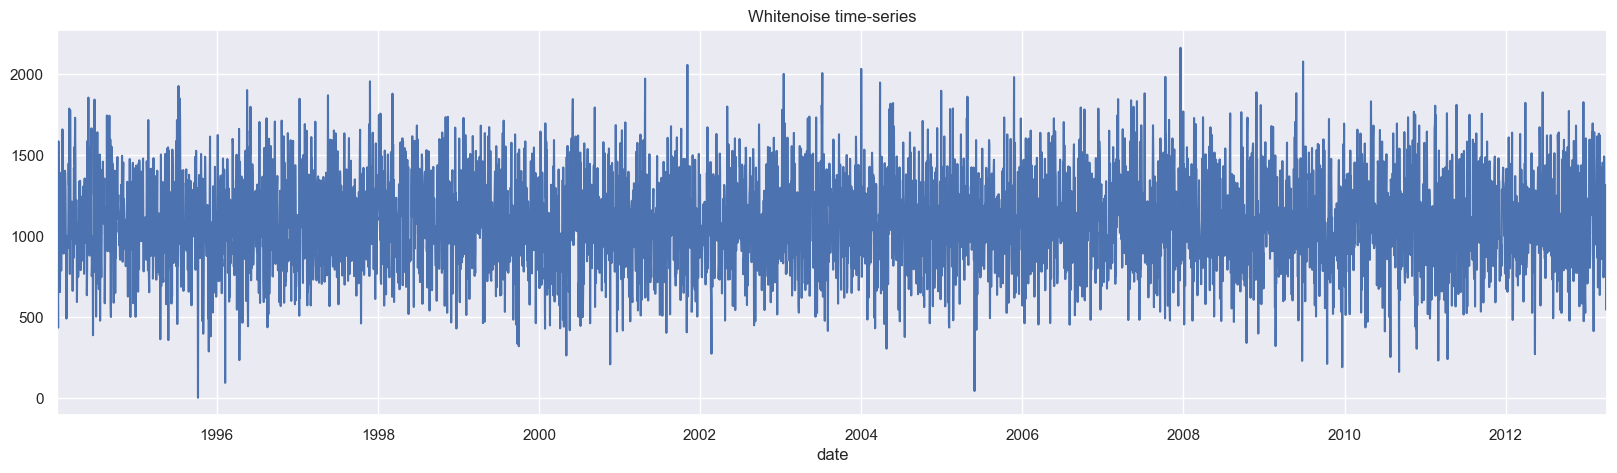

In [49]:
df.wn.plot(figsize = (20,5))
plt.title('Whitenoise time-series')

Text(0.5, 1.0, 'SP500 prices')

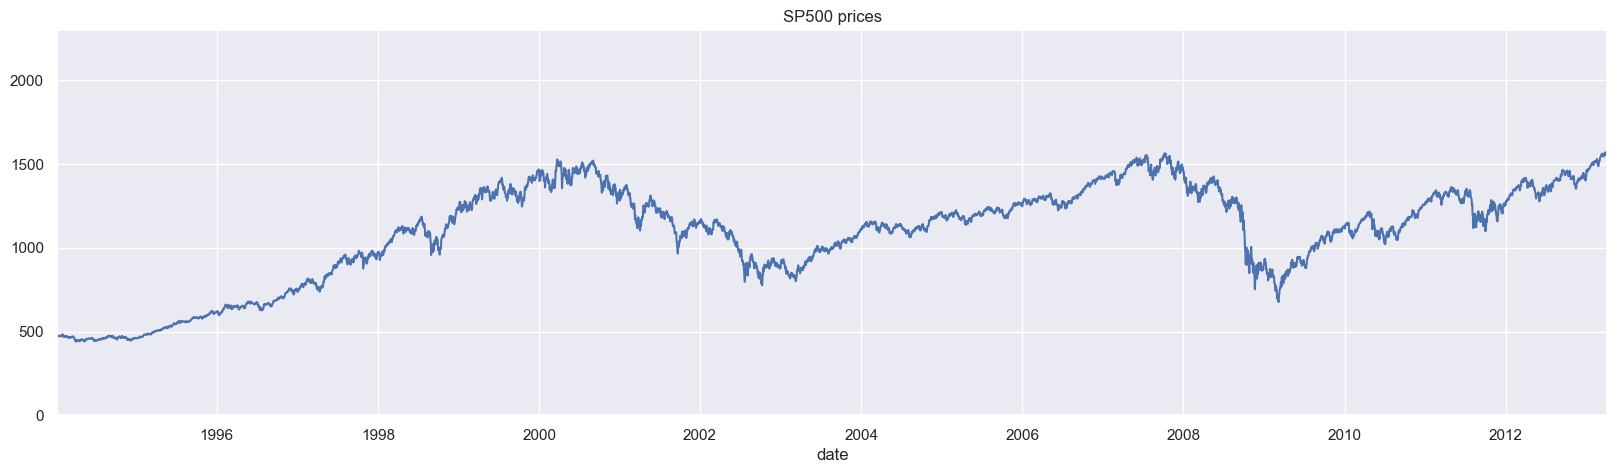

In [50]:
df.SP500_market_value.plot(figsize = (20,5))
plt.ylim(0,2300)
plt.title('SP500 prices')

Random walk:  
A special type of time-series, where values tend to persist over time and the differences between periods are simply white noise  

In [51]:
rw = pd.read_csv("C:/Users/lochr/Python/time series/course materials/Section 5/2_Random Walk/RandWalk.csv")
rw

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245
...,...,...
7024,01/04/2013,2263.675474
7025,02/04/2013,2225.000870
7026,03/04/2013,2190.787688
7027,04/04/2013,2195.240033


In [52]:
rw.date = pd.to_datetime(rw.date,dayfirst = True)
rw.set_index('date', inplace = True)
rw = rw.asfreq('b')

In [53]:
rw

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255
...,...
2013-04-01,2263.675474
2013-04-02,2225.000870
2013-04-03,2190.787688


In [54]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [55]:
df['rw'] = rw.price
df

C:\Users\lochr\AppData\Local\Temp\ipykernel_11000\2775213781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


,SP500_market_value,wn,rw
date,,,
1994-01-07,469.900000,699.579953,1122.139662
1994-01-10,475.270000,818.347649,1080.347860
1994-01-11,474.130000,752.604698,1082.095245
1994-01-12,474.170000,435.783264,1083.639265
1994-01-13,472.470000,1585.745288,1067.146255
...,...,...,...
2013-04-01,1562.173837,1317.220017,2263.675474
2013-04-02,1570.252238,546.390200,2225.000870
2013-04-03,1553.686978,1283.753913,2190.787688


Text(0.5, 1.0, 'SP500 vs random walk')

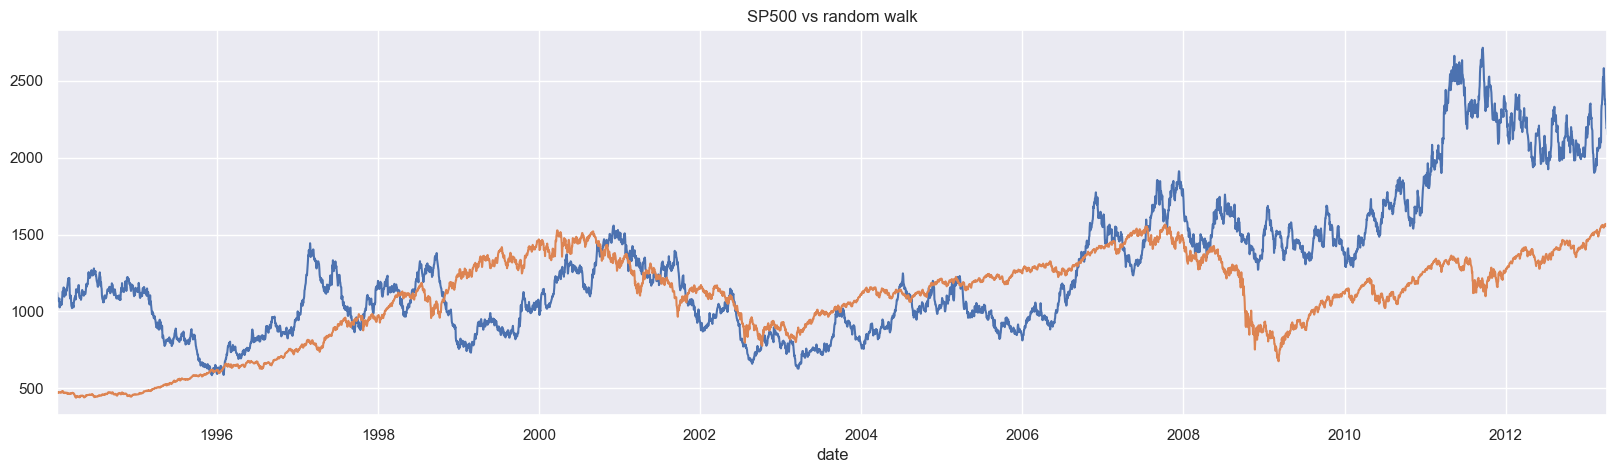

In [56]:
df.rw.plot(figsize = (20,5))
df.SP500_market_value.plot(figsize = (20,5))
plt.title('SP500 vs random walk')
#both plots in common:
#small variations between consecutive time periods
#cyclical increases and decreases in short periods of time

Market efficiency:  
level of difficulty in forecasting correct future values  
If prices movements resembles random walk --> difficult to predict/low accuracy  
If prices movements can be predicted, opportunities of arbitrage arises  
Arbitrage: Buy and sell commodities and make a safe profit, while the price adjusts  
Theory: investors will take the advantage, prices adjusts accordingly in the market --> market is efficient and will lead to market equilibrium

Stationarity  
Weak-form/covariance stationarity: Taking consecutive data of the same size, different datasets should have the same covariance, regardless of starting point.
Key asseumptions:
1. constant mean
2. constant variance
3. consistent covariance of datasets if taking consecutive data of the same size

Covariance stationarity example: White noise  
mean = 0  
Constant variance  
Covariance = Correlation*STD = 0  

Dicky-Fuller test (DF test)  
Null: non-stationarity  


In [57]:
sts.adfuller(df.SP500_market_value)
#1st line - test statistic of running the test, use to compare to critical value to determine whethere there is significant proof to stationarity
#% - significant levels
# t-statistic > each of the sig lv.: No sufficient evidence of stationarity in the datasets for all 3 sig levs

(-1.7369847452352383,
 0.4121645696770649,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [58]:
sts.adfuller(df.wn)
#whitenoise: stationary

(-71.25117456303515,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70839.21358005032)

In [59]:
sts.adfuller(df.rw)
#rw: non-stationary

(-1.3286073927689712,
 0.6159849181617387,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

Seasonality: trends will appear on a cyclical basis  
eg. temperature rise in summer/fall in winter  
Testing for seasonality
Decomposition: Decompose the sequence - split the TS into 3 effects:
1. Trend - Pattern consistent throughout the data
2. Seasonal - All cyclical effects due to seasonality
3. Residual - Error of prediction/difference between actual data and the model we fit  

Naive decomposition: linear relationship between the 3 parts above and the observed TS  
For any time period,  
1. Additive: , observed series = trend+seasonal+residual
2. Multiplicative: observed series = trend*seasonal*residual


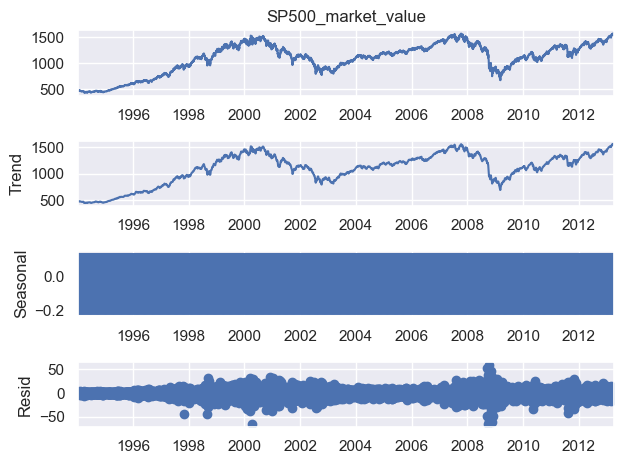

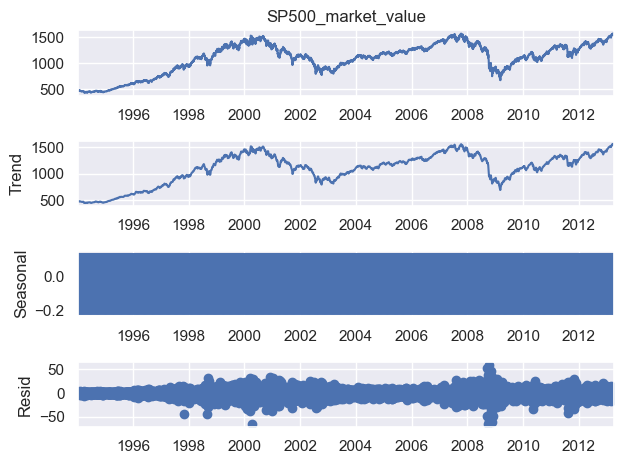

In [60]:
s_dec_additive = seasonal_decompose(df.SP500_market_value, model = 'additive')
s_dec_additive.plot()
#this model uses previous period values as a trend-setter
#eg if price of month start is higher than month end, 
#then use data 30 periods ago will be more accurate than using data 1 period ago
#seasonal plot: no concrete cyclical pattern observed
#residual: diference between true values and predictions for any period
#fluctuates betwen 2000 and 2008: instability caused by dotcom and housing bubbles
#the below graph suggest no seasonality in the data

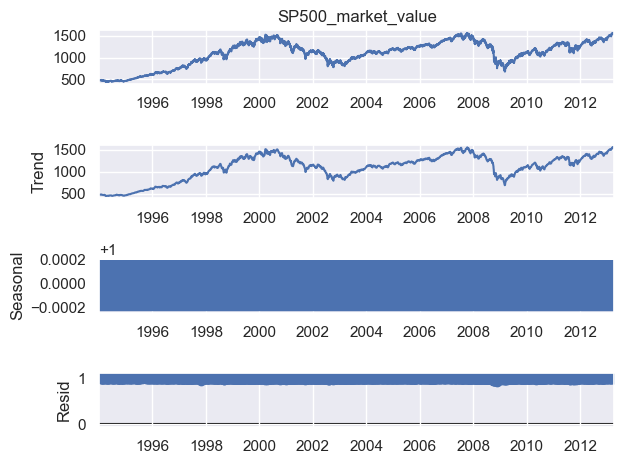

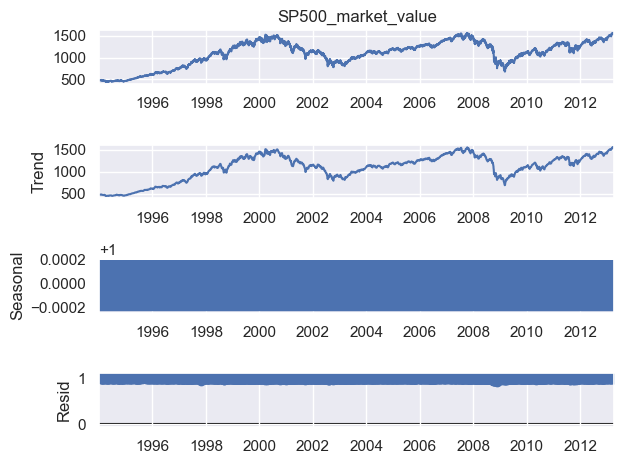

In [61]:
s_dec_multiplicative = seasonal_decompose(df.SP500_market_value, model = 'multiplicative')
s_dec_multiplicative.plot()

In [62]:
#ACF

Text(0, 0.5, 'autocorrelation coefficient')

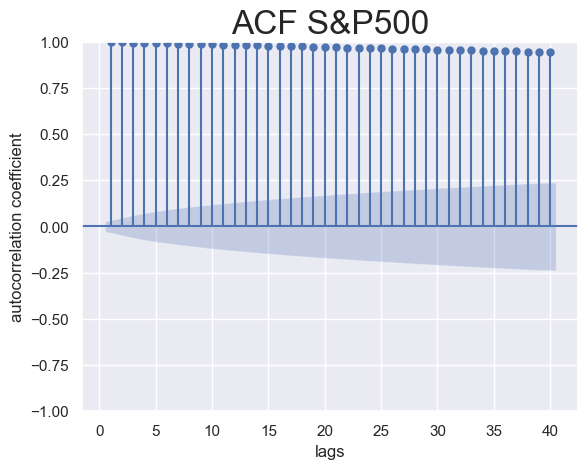

In [63]:
sgt.plot_acf(df.SP500_market_value, lags = 40, zero = False)
plt.title('ACF S&P500', size = 24)
plt.xlabel('lags')
plt.ylabel('autocorrelation coefficient')


blue shades = significance, expands as lags value increases, greater the distance in time, more unlikely it is that the autocorrelation persists

all blue dots much higher than the shade area: 
1. suggest coefficient is significant
2. an indicator of time dependence in the data
3. autocorrelation barely diminish as lag increases, ie price a month ago still serves as decent indicator
 - autocorrelation decreases as time period distance increase

Text(0, 0.5, 'autocorrelation coefficient')

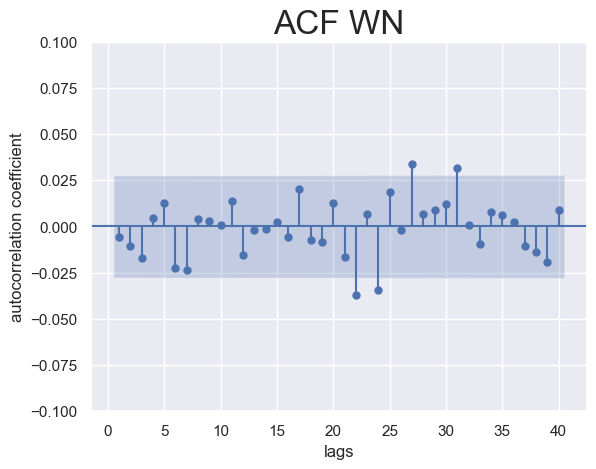

In [66]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title('ACF WN', size = 24)
plt.xlabel('lags')
plt.ylim([-0.1, 0.1])
plt.ylabel('autocorrelation coefficient')


1. some positive some negative
2. almost all dots fall within the blue area
3. no autocorrealation for any lag(one of the assumptions of white noise data)


Text(0, 0.5, 'autocorrelation coefficient')

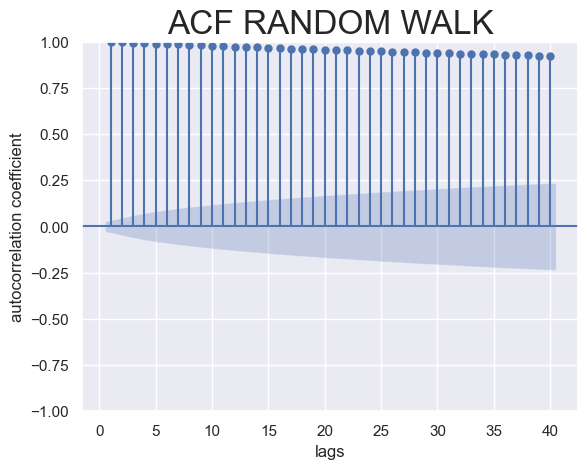

In [71]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title('ACF RANDOM WALK', size = 24)
plt.xlabel('lags')
plt.ylabel('autocorrelation coefficient')


direct and indirect

Text(0, 0.5, 'autocorrelation coefficient')

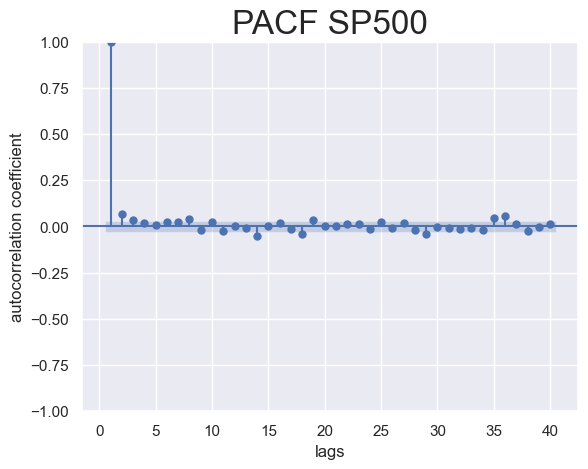

In [67]:
sgt.plot_pacf(df.SP500_market_value, lags = 40, zero = False, method = ('OLS'))
plt.title('PACF SP500', size = 24)
plt.xlabel('lags')

plt.ylabel('autocorrelation coefficient')

some negative values
cancels out all additional channels a previous period value affects the present one
PCF: 
PACF and ACF values for the first lag should be identical
after 3rd value: all points not significantly different from 0, numeric values attached are not important
being +ve or -ve is somewhat random without any lasting effects


Text(0, 0.5, 'autocorrelation coefficient')

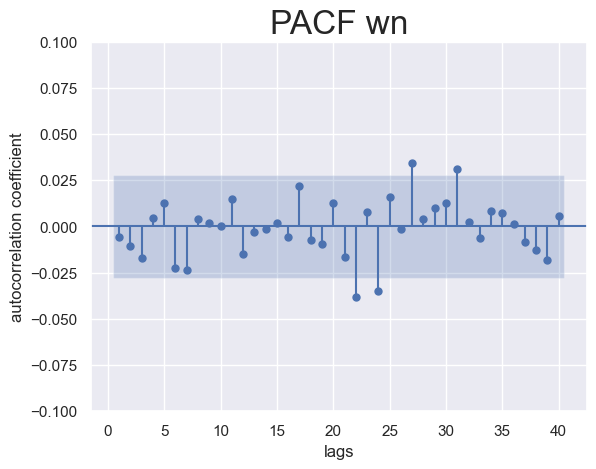

In [69]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('OLS'))
plt.title('PACF wn', size = 24)
plt.xlabel('lags')
plt.ylim([-0.1, 0.1])
plt.ylabel('autocorrelation coefficient')

no autocorrelation in whitenoise

Text(0, 0.5, 'autocorrelation coefficient')

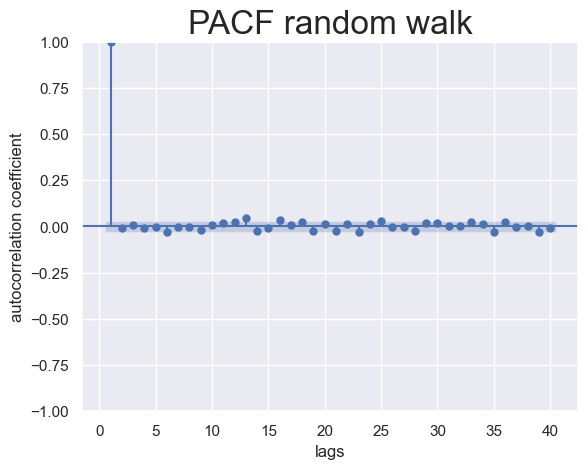

In [73]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('OLS'))
plt.title('PACF random walk', size = 24)
plt.xlabel('lags')

plt.ylabel('autocorrelation coefficient')

(PACF) and (ACF) of a random walk and the S&P 500 time series look similar. 

As both random walk and the S&P 500 time series are non-stationary, meaning their statistical properties like mean and variance change over time.

In a non-stationary time series, the PACF and ACF do not decay to zero over time, which makes it difficult to distinguish between the two. This is why it's important to transform the data to make it stationary before applying time series models that assume stationarity.

To differentiate between a random walk and a non-stationary time series like the S&P 500, you may need to look at other characteristics of the data, such as the trend, seasonality, and the presence of any shocks or structural breaks. You may also want to consider using more sophisticated time series models that can handle non-stationary data, such as the autoregressive integrated moving average (ARIMA) or the vector autoregression (VAR) models.

In [75]:
model_ar = ARMA(df.market_value, order = (1,0))

AttributeError: 'DataFrame' object has no attribute 'market_value'

In [ ]:
results_ar = model_ar.fit()


In [ ]:
results_ar.summary